The Sparks Foundation - Data Sciense & Business Analytics Internship


In [1]:
#Author - More Dnyaneshwar Vishnu
#Batch - April 2022


In [2]:
"""
Task 2 -Prediction Using Decision Tree Algorithm.
Create the Decision Tree classifier for Iris dataset and visualize it graphically.
"""

'\nTask 6 -Prediction Using Decision Tree Algorithm.\nCreate the Decision Tree classifier for Iris dataset and visualize it graphically.\n'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

Importing Tha data

In [4]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Preparing the data
X=df.iloc[:,:-1]
y=df.species

In [7]:
#Splitting the data into training & test sets
X_train,Y_test,x_train,y_test=train_test_split(X,y,train_size=0.7)
print('X_train.shape:',X_train.shape)
print('Y_test.shape :', Y_test.shape)

X_train.shape: (105, 4)
Y_test.shape : (45, 4)


In [8]:
scalar=MinMaxScaler().fit(X_train)
X_train=scalar.transform(X_train)
Y_test=scalar.transform(Y_test)

In [9]:
model = DecisionTreeClassifier(random_state=42)  #replicate results
model.fit(X_train,x_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Let's check the depth of the tree that was created.
model.tree_.max_depth

5

In [11]:
test_preds=model.predict(Y_test)
pd.value_counts(test_preds)

versicolor    16
setosa        15
virginica     14
dtype: int64

In [12]:
accuracy_score(y_test, test_preds)

0.8666666666666667

In [13]:
"""
Visualization
We can visualize the decision tree learned from the training data.
"""

'\nVisualization\nWe can visualize the decision tree learned from the training data.\n'

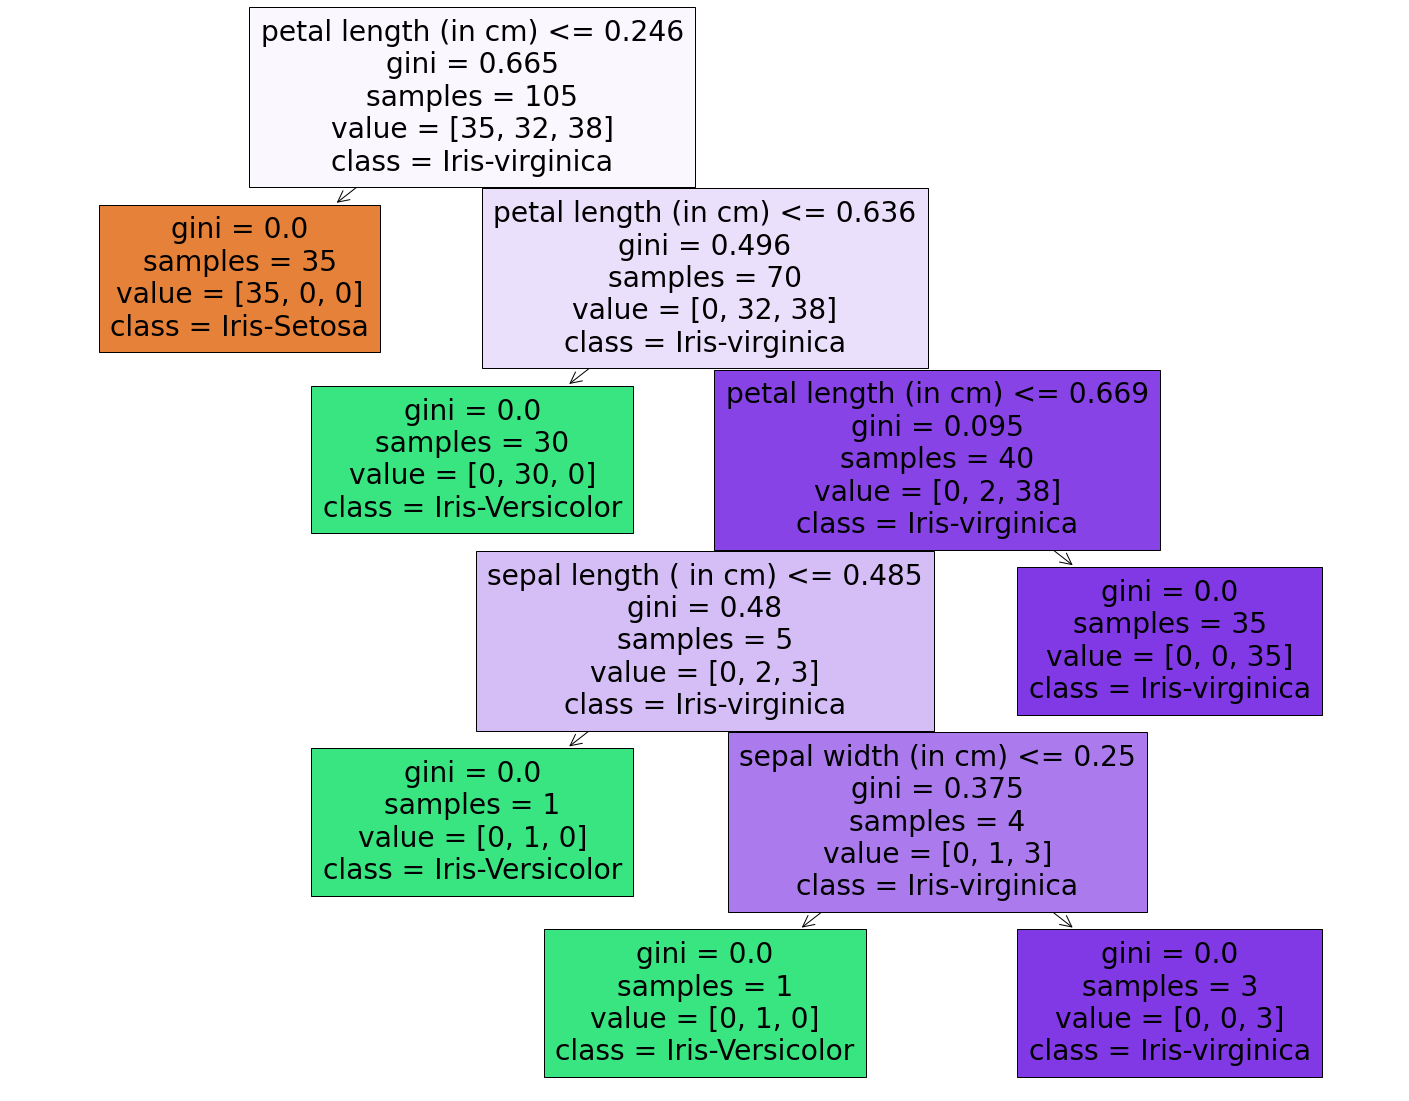

In [14]:
plt.figure(figsize=(25,20))
feature_Name=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
class_Name=['Iris-Setosa','Iris-Versicolor','Iris-virginica']
plot_tree(model, feature_names=feature_Name,class_names=class_Name, filled=True);

In [15]:
tree_text = export_text(model, max_depth=10, feature_names=feature_Name)
print(tree_text[:5000])

|--- petal length (in cm) <= 0.25
|   |--- class: setosa
|--- petal length (in cm) >  0.25
|   |--- petal length (in cm) <= 0.64
|   |   |--- class: versicolor
|   |--- petal length (in cm) >  0.64
|   |   |--- petal length (in cm) <= 0.67
|   |   |   |--- sepal length ( in cm) <= 0.49
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal length ( in cm) >  0.49
|   |   |   |   |--- sepal width (in cm) <= 0.25
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal width (in cm) >  0.25
|   |   |   |   |   |--- class: virginica
|   |   |--- petal length (in cm) >  0.67
|   |   |   |--- class: virginica



In [16]:
model.feature_importances_

array([0.01288871, 0.02148118, 0.96563011, 0.        ])

In [17]:
#Let's turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'feature':feature_Name,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
2,petal length (in cm),0.965630
1,sepal width (in cm),0.021481
0,sepal length ( in cm),0.012889
3,petal width (in cm),0.000000


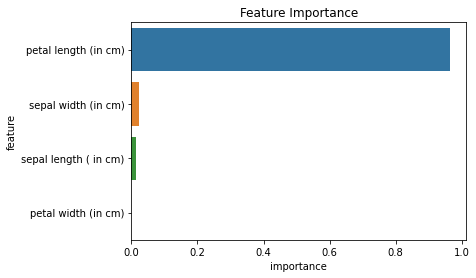

In [18]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [19]:
sepal_length=3.0
sepal_width=2.7
petal_length=0.9
petal_width=2.5
new_info = [[sepal_length,sepal_width,petal_length,petal_width]]
result=model.predict(new_info)
print(result)

['virginica']
